In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Open the data
df = pd.read_csv("spotify-2023.csv", encoding="utf-8", encoding_errors="ignore")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
# See what type of data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#To check how many missing values are there for each column
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
# Since the data type of column "streams" is in "objects", convert the data type to "int64" by using the code below
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["streams"]

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

# Mean, Median, Standard Deviation

In [7]:
df["streams"].mean()

514137424.93907565

In [8]:
df["streams"].median()

290530915.0

In [9]:
df["streams"].std()

566856949.0388832

# Released Year and Artist Count Distribution

Text(0, 0.5, 'Artist Count')

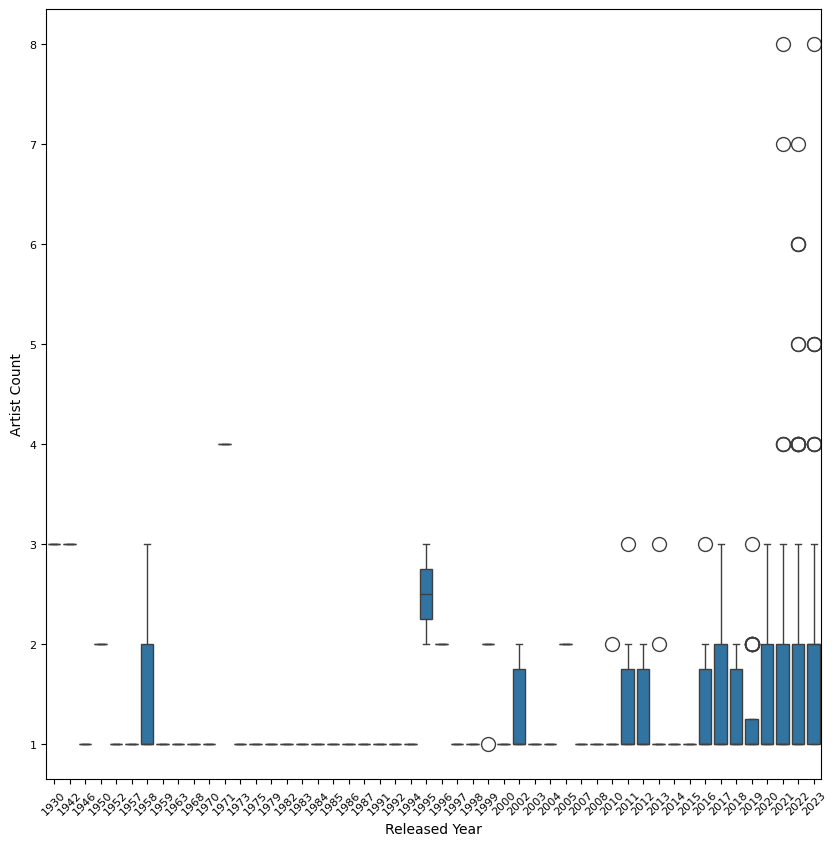

In [11]:
#Using boxplot, we can find the distribution for released_year and artist_counts. Consider our x axis is released_year and y axis is artist_count
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x ='released_year', y='artist_count', linewidth=1, fliersize=10)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel("Released Year",fontsize=10) 
plt.ylabel("Artist Count",fontsize=10)  

# Top Performers

In [13]:
#To find the top 5 tracks based on the number of streams
df.loc[df['streams'].nlargest(5).index, 'track_name']

55                                   Blinding Lights
179                                     Shape of You
86                                 Someone You Loved
620                                     Dance Monkey
41     Sunflower - Spider-Man: Into the Spider-Verse
Name: track_name, dtype: object

In [14]:
#Top 5 artist based on the number of tracks 
df["artist(s)_name"].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 645, dtype: int64

# Temporal Trends

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450')])

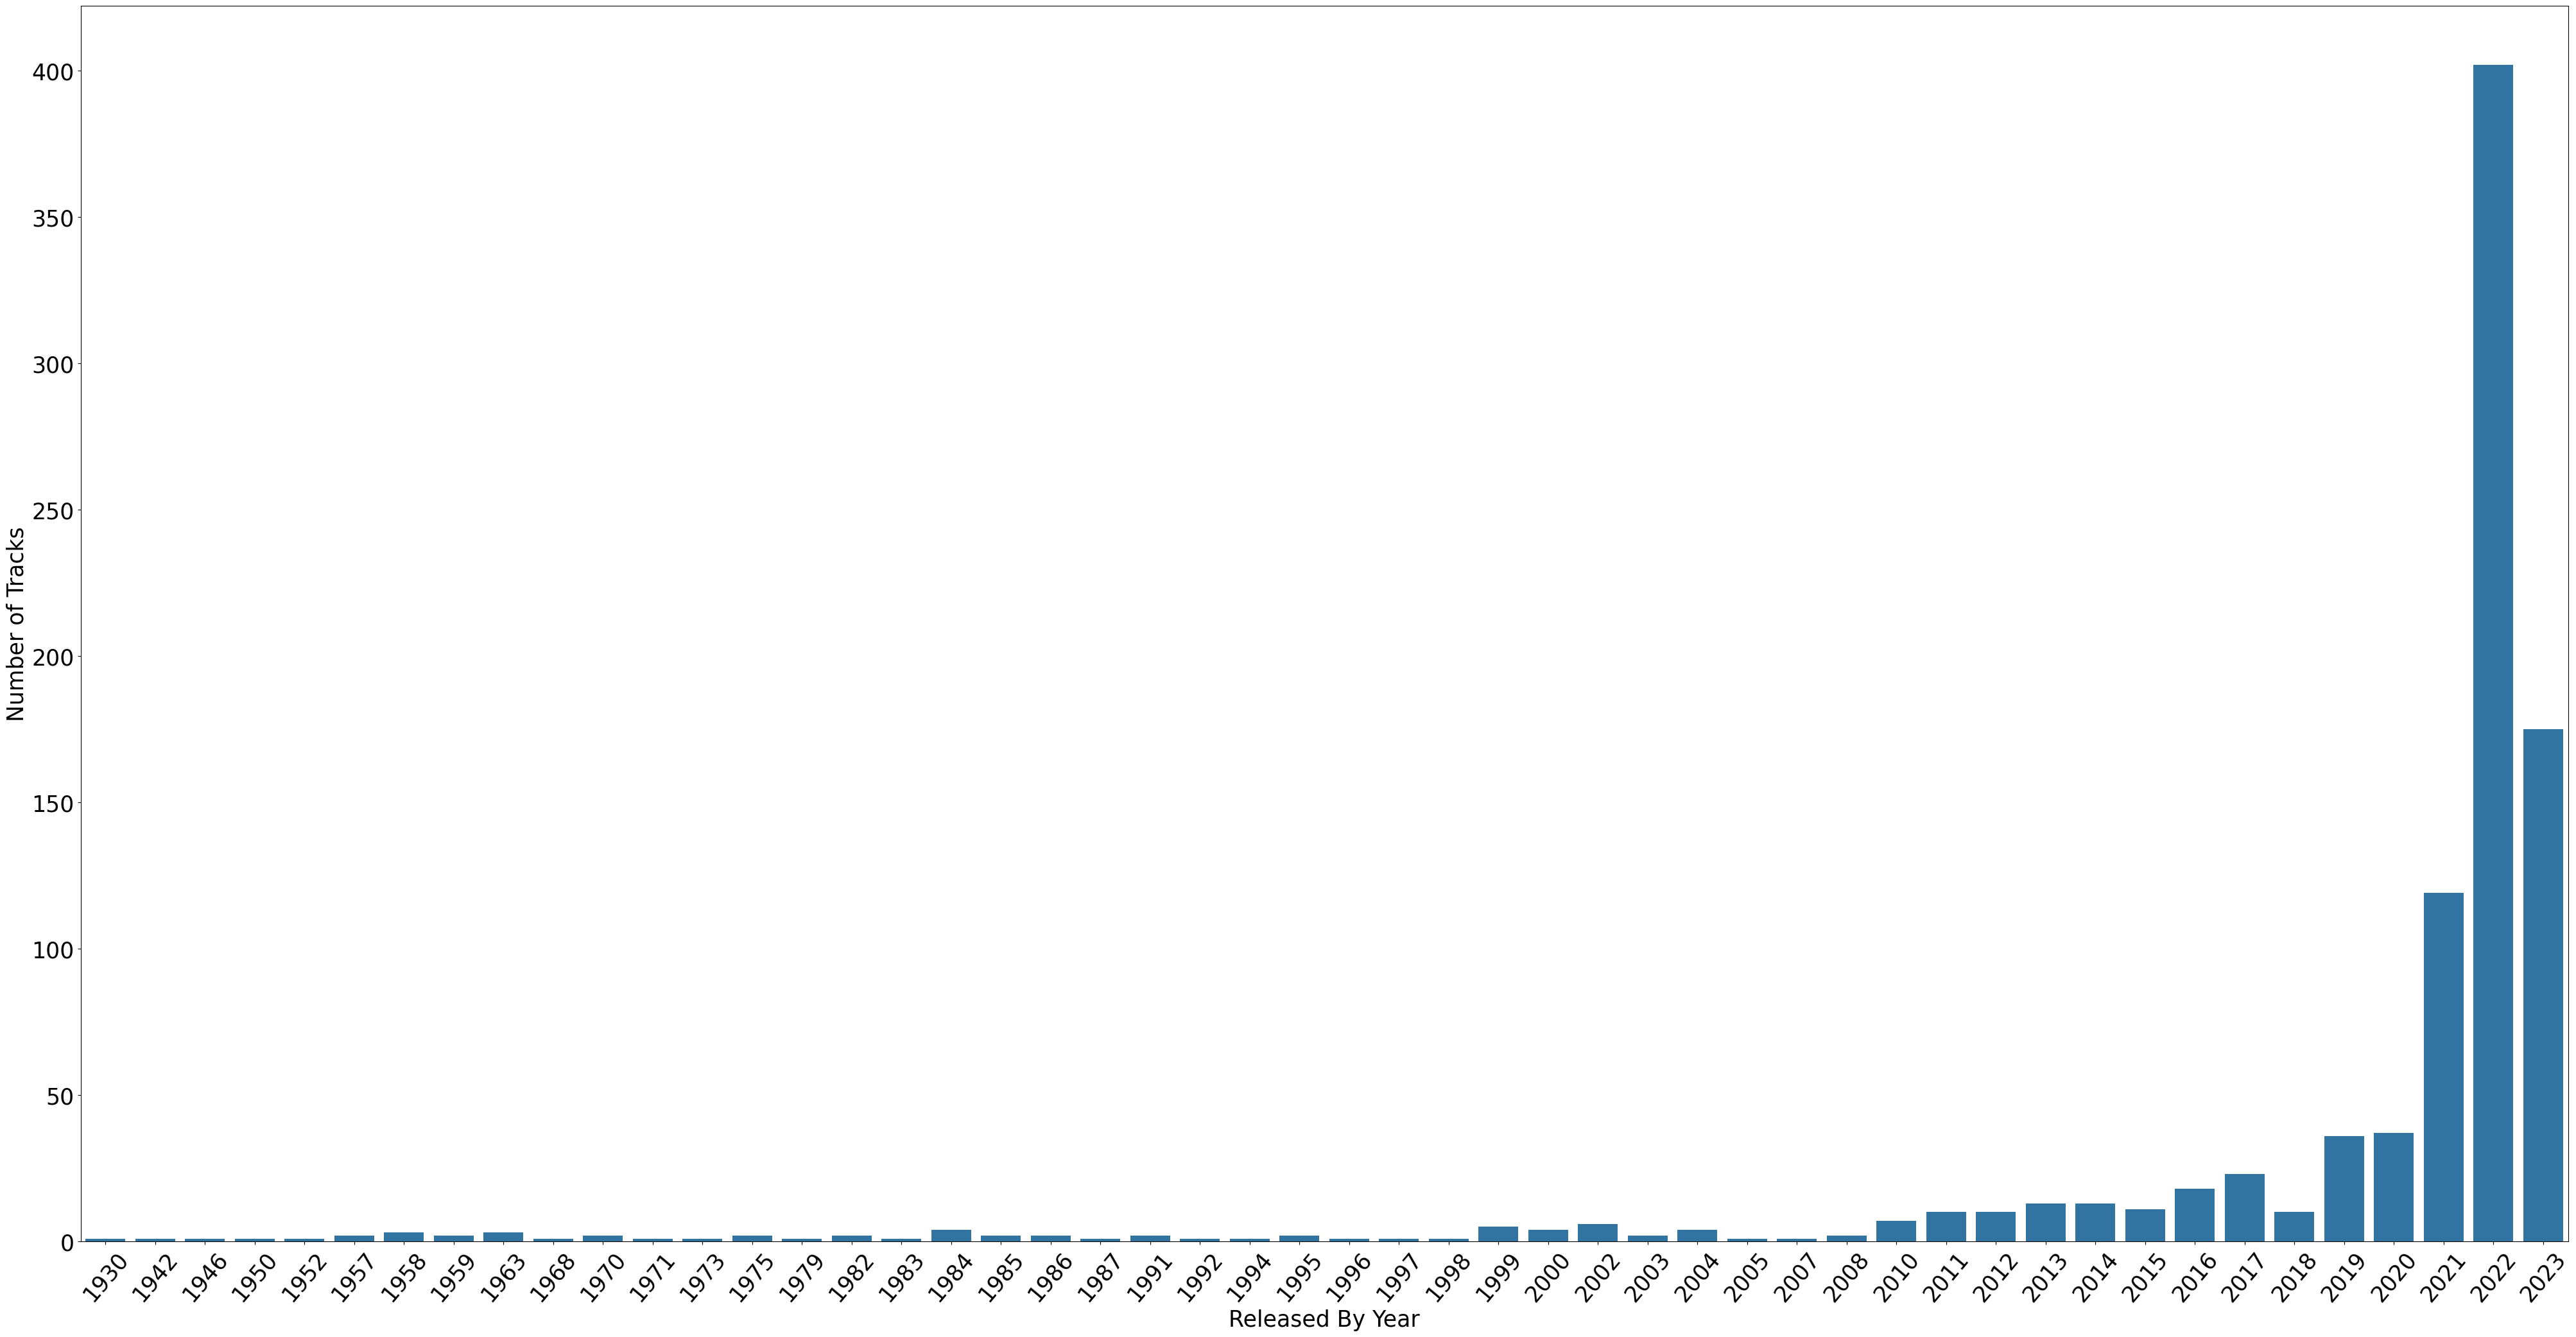

In [16]:
# The chart for number of tracks that is released per year.
plt.figure(figsize=(50,25))
sns.countplot(x="released_year", data=df)
plt.xlabel("Released By Year",fontsize=25)
plt.ylabel("Number of Tracks",fontsize=25)
plt.xticks(rotation=50,fontsize=25)
plt.yticks(fontsize=25)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160')])

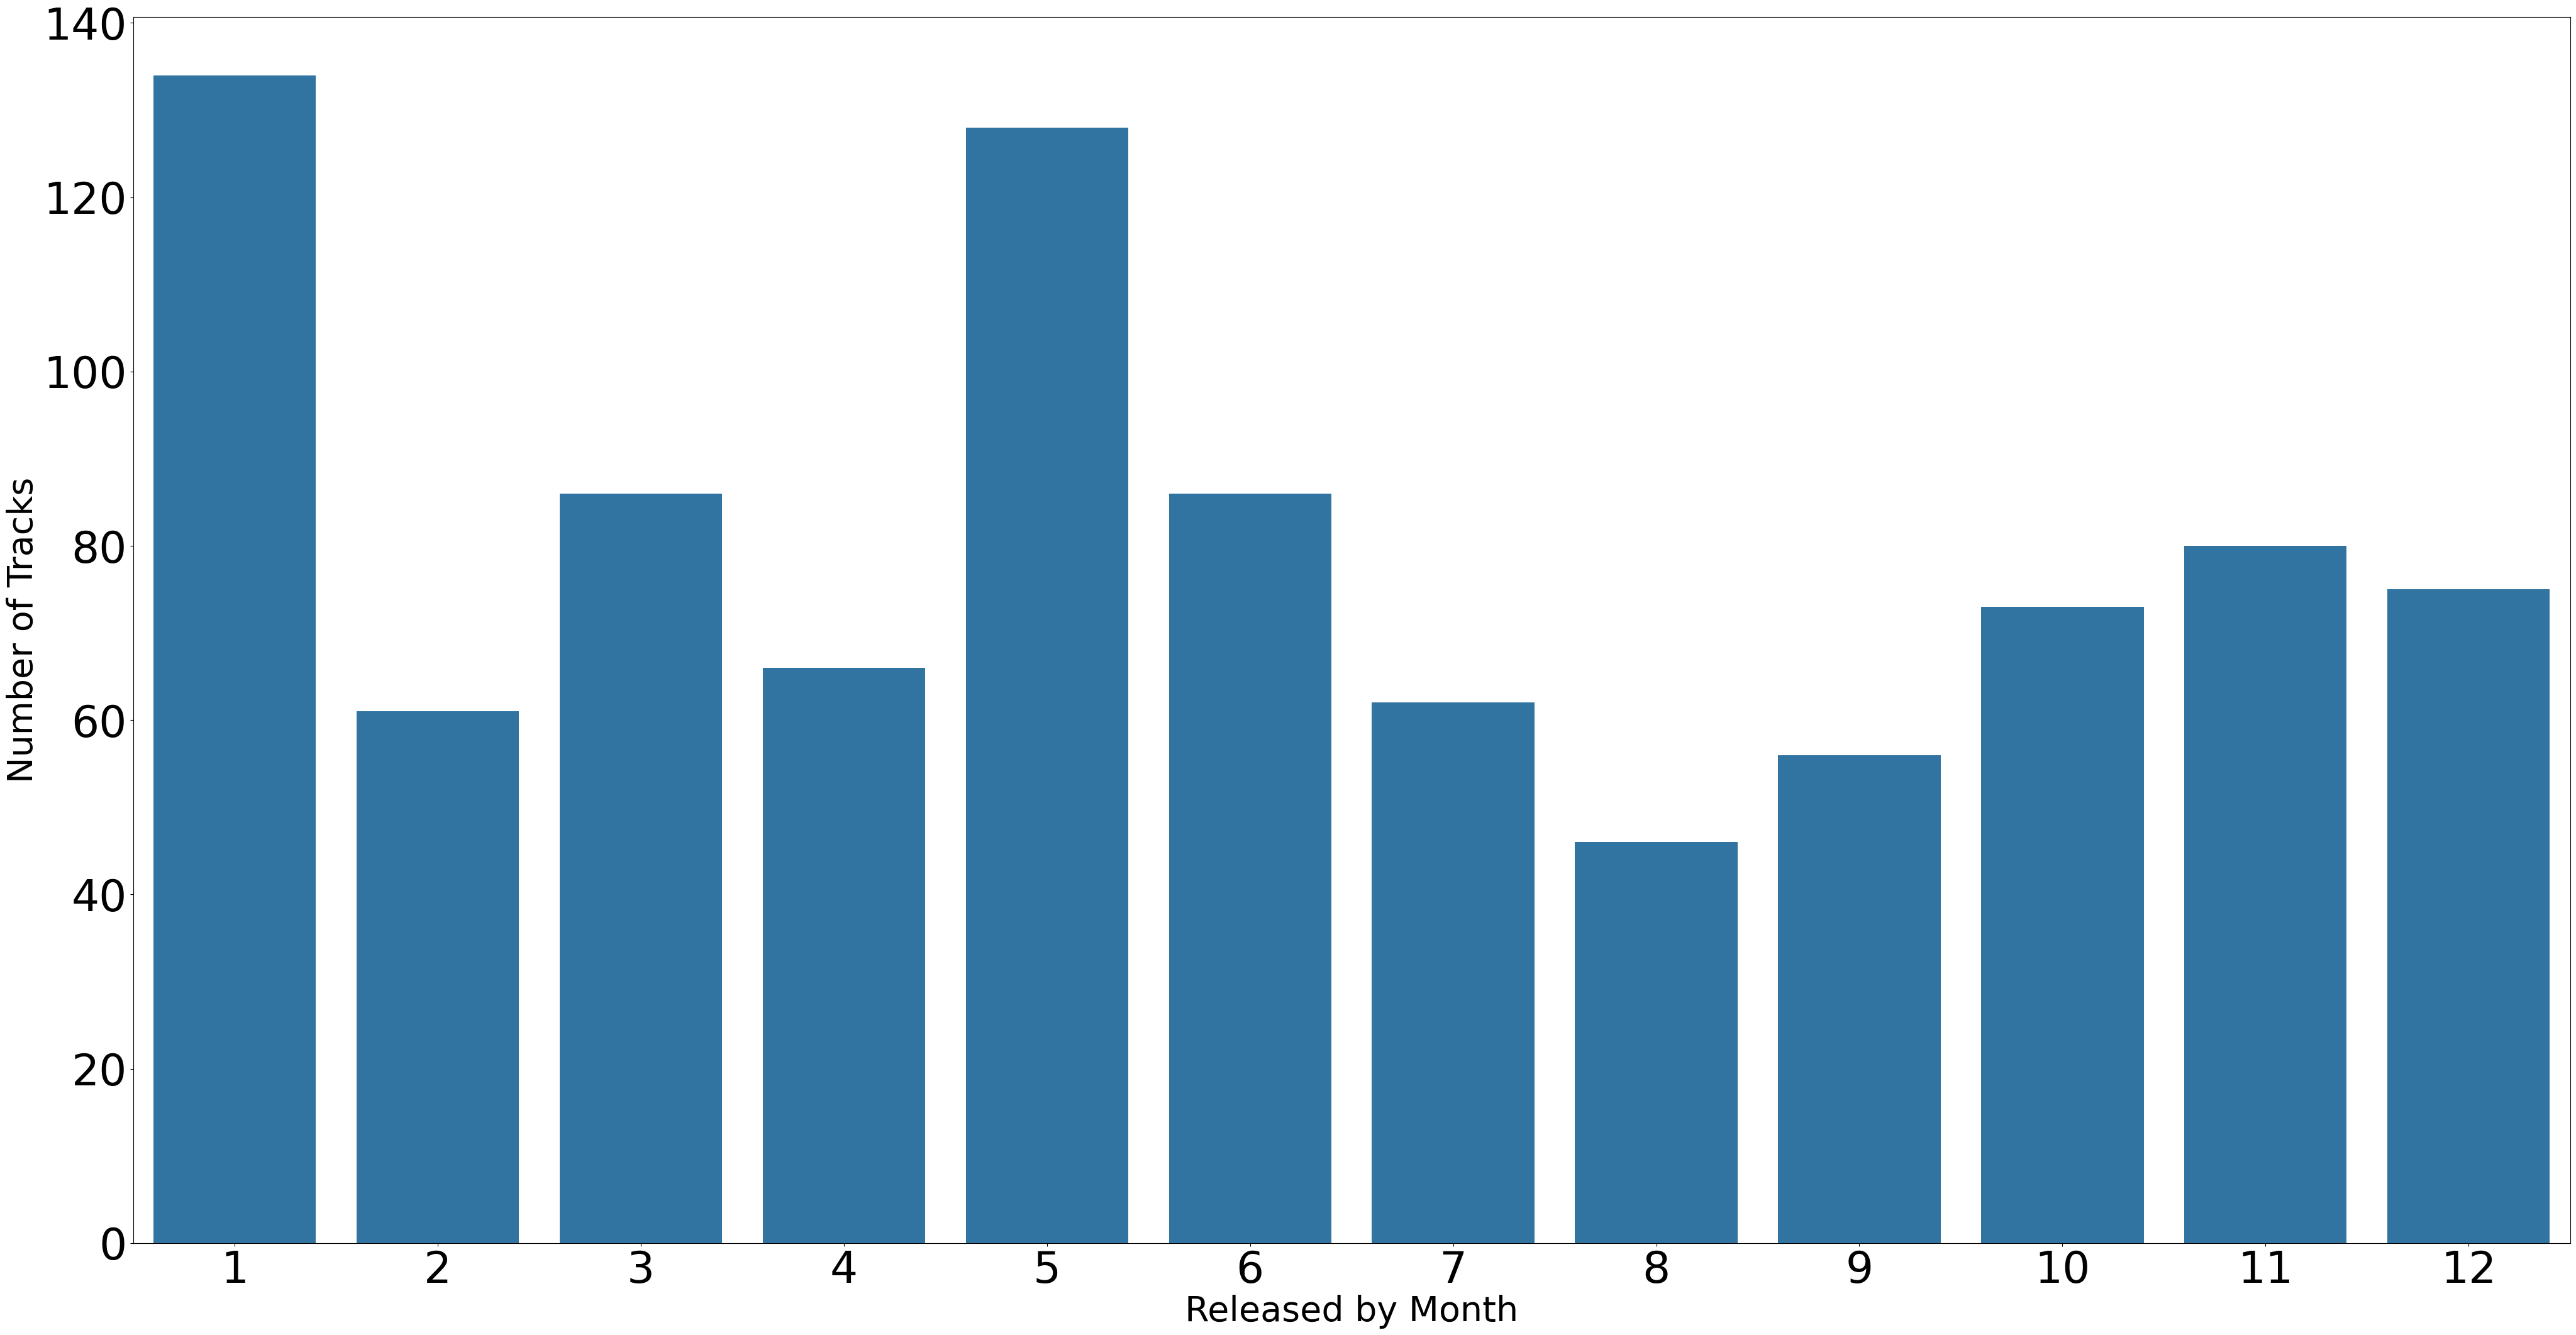

In [17]:
#Plotting the number of tracks released per month.
plt.figure(figsize=(50,25))
sns.countplot(x="released_month", data=df)
plt.subplots_adjust(bottom=0.1)
plt.xlabel("Released by Month",fontsize=40)
plt.ylabel("Number of Tracks",fontsize=40)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

#  Genre and Music Characteristics


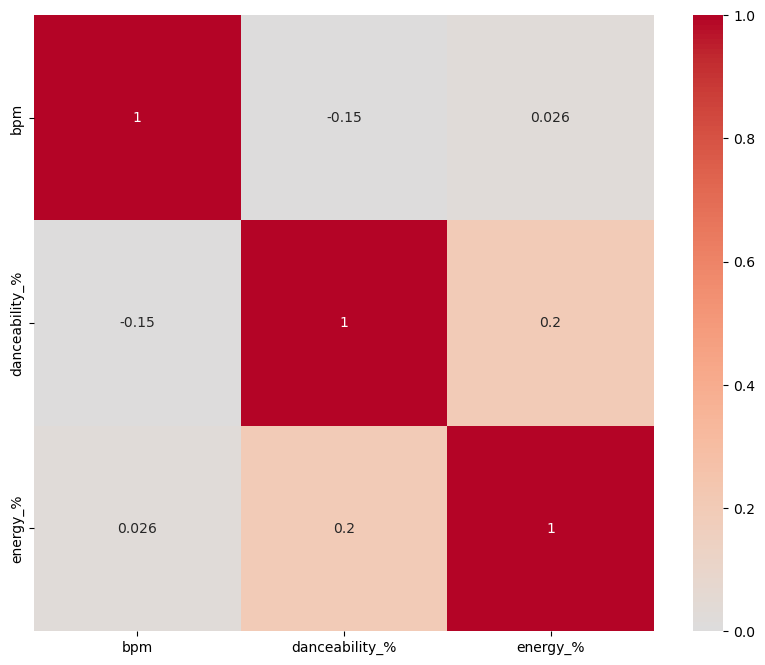

In [19]:
# Heatmap Chart
plt.figure(figsize=(10,8))
sns.heatmap(df[['bpm','danceability_%','energy_%']].corr(), cmap='coolwarm', vmin=0, vmax=1, center=0, annot=True)
plt.show()

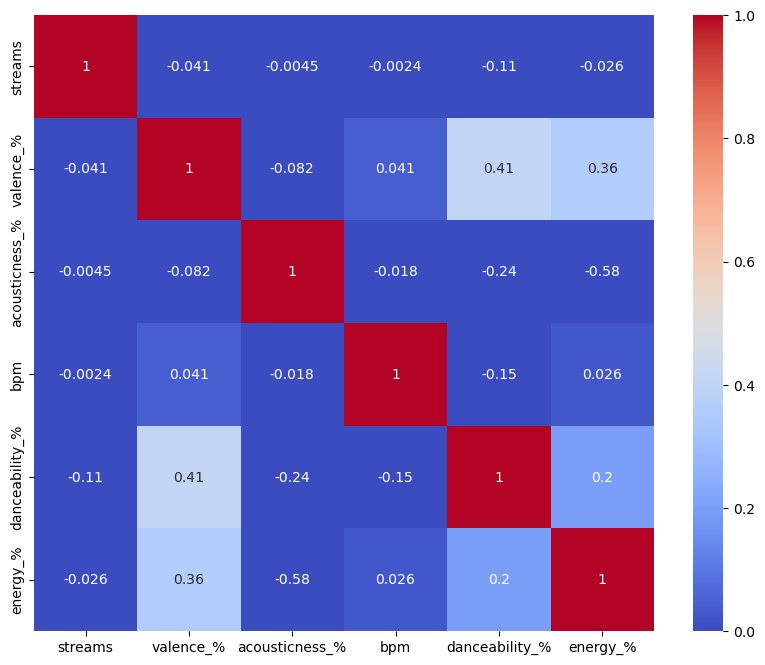

In [20]:
#Second Heatmap chart 
plt.figure(figsize=(10,8))
sns.heatmap(df[['streams','valence_%','acousticness_%','bpm','danceability_%','energy_%']].corr(), cmap='coolwarm', vmin=0, vmax=1, annot=True)
plt.show()

# Platform Popularity



In [22]:
#Indexing
df[['in_spotify_playlists','in_deezer_playlists','in_apple_playlists']]

,in_spotify_playlists,in_deezer_playlists,in_apple_playlists
0,553,45,43
1,1474,58,48
2,1397,91,94
3,7858,125,116
4,3133,87,84
...,...,...,...
948,953,37,61
949,1180,8,4
950,573,7,2
951,1320,17,29


# Advanced Analysis

<Axes: xlabel='key', ylabel='streams'>

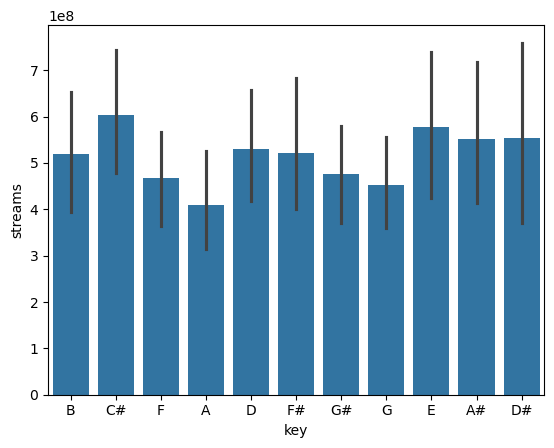

In [24]:
#Bar Plotting to see if there is a similarties for each key
sns.barplot(data=df, x='key', y='streams')

<Axes: xlabel='mode', ylabel='streams'>

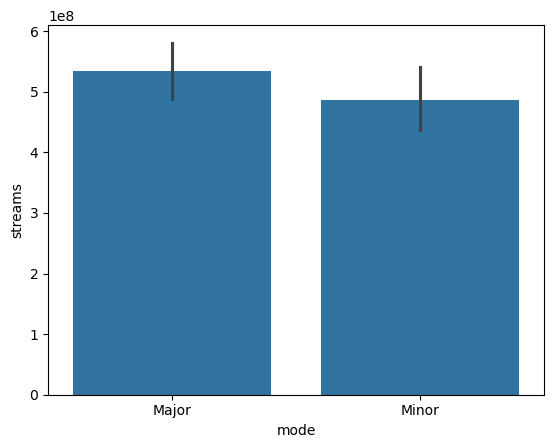

In [25]:
#Bar Plotting to see if there is a similarties for each mode
sns.barplot(data=df, x='mode', y='streams')

In [81]:
#Top artist who appears in the Spotify playlist
df.loc[df['in_spotify_playlists'].value_counts().max(), 'artist(s)_name']

'Taylor Swift'

In [83]:
#Top artist who appears in the Spotify charts
df.loc[df['in_spotify_charts'].value_counts().max(), 'artist(s)_name']

'Taylor Swift'

In [85]:
#Top artist who appears in the Deezer playlist
df.loc[df['in_deezer_playlists'].value_counts().max(), 'artist(s)_name']

'The Weeknd, Madonna, Playboi Carti'

In [87]:
#Top artist who appears in the Deezer charts
df.loc[df['in_deezer_charts'].value_counts().max(), 'artist(s)_name']

'Chris Brown, Rvssian, Rauw Alejandro'

In [89]:
#Top artist who appears in the Apple playlist
df.loc[df['in_apple_playlists'].value_counts().max(), 'artist(s)_name']

'Bizarrap, Peso Pluma'

In [91]:
#Top artist who appears in the Apple charts
df.loc[df['in_apple_charts'].value_counts().max(), 'artist(s)_name']

'Taylor Swift'